# ADS - Network analysis module. Homework 2

In [3]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stats
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


load assingment data

In [125]:
dataA=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/networkA.csv' , header=0 )
XY=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/networkA_XY.csv' , header=0 )

In [126]:
dataB=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/networkB.csv' , header=0 )
PB=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/PB.csv' , header=0 )

## Problem 1 (20% of credit)

Find and visualize shortest path between nodes 1 and 20 in the above spatial network A in terms of
a) network topology
b) spatial distance

In [128]:
dA = pd.merge(dataA,XY,on='Unnamed: 0')
dB = pd.merge(dataB, PB, on='Unnamed: 0')

In [129]:
G = nx.DiGraph()
for i in dataA.index:
       G.add_edge(dataA.a[i],dataA.b[i])

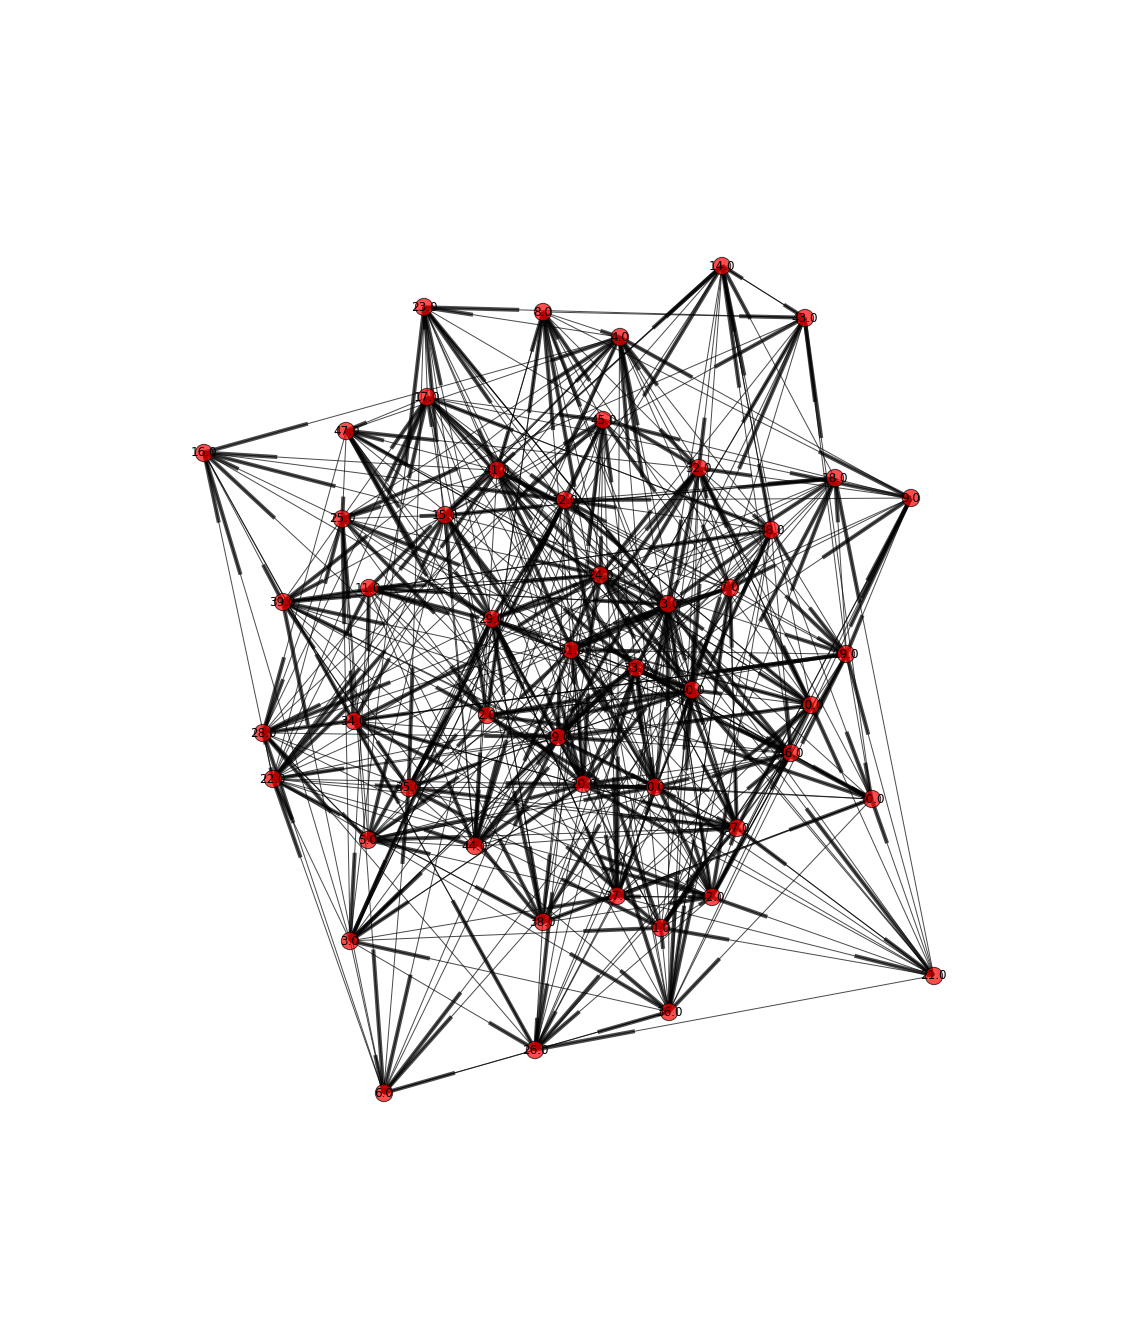

In [130]:
plt.figure(figsize = (15,18))
nx.draw(G, with_labels = True, alpha = 0.7)

In [131]:
shortestpath_a = nx.shortest_path(G, G.nodes()[1], G.nodes()[20])
print len(shortestpath_a)

3


In [132]:
IntPos={}
for c in XY.index:
    IntPos[c]=(XY.X[c],XY.Y[c])

In [133]:
def visualize_path(path, graph):
    plt.figure(figsize = (15,18))
    nx.draw(graph, pos = IntPos, with_labels = True, alpha = 0.4)
    x=[IntPos[v][0] for v in path]
    y=[IntPos[v][1] for v in path]
    plt.plot(x,y,'bo-', lw = 7)
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=14)

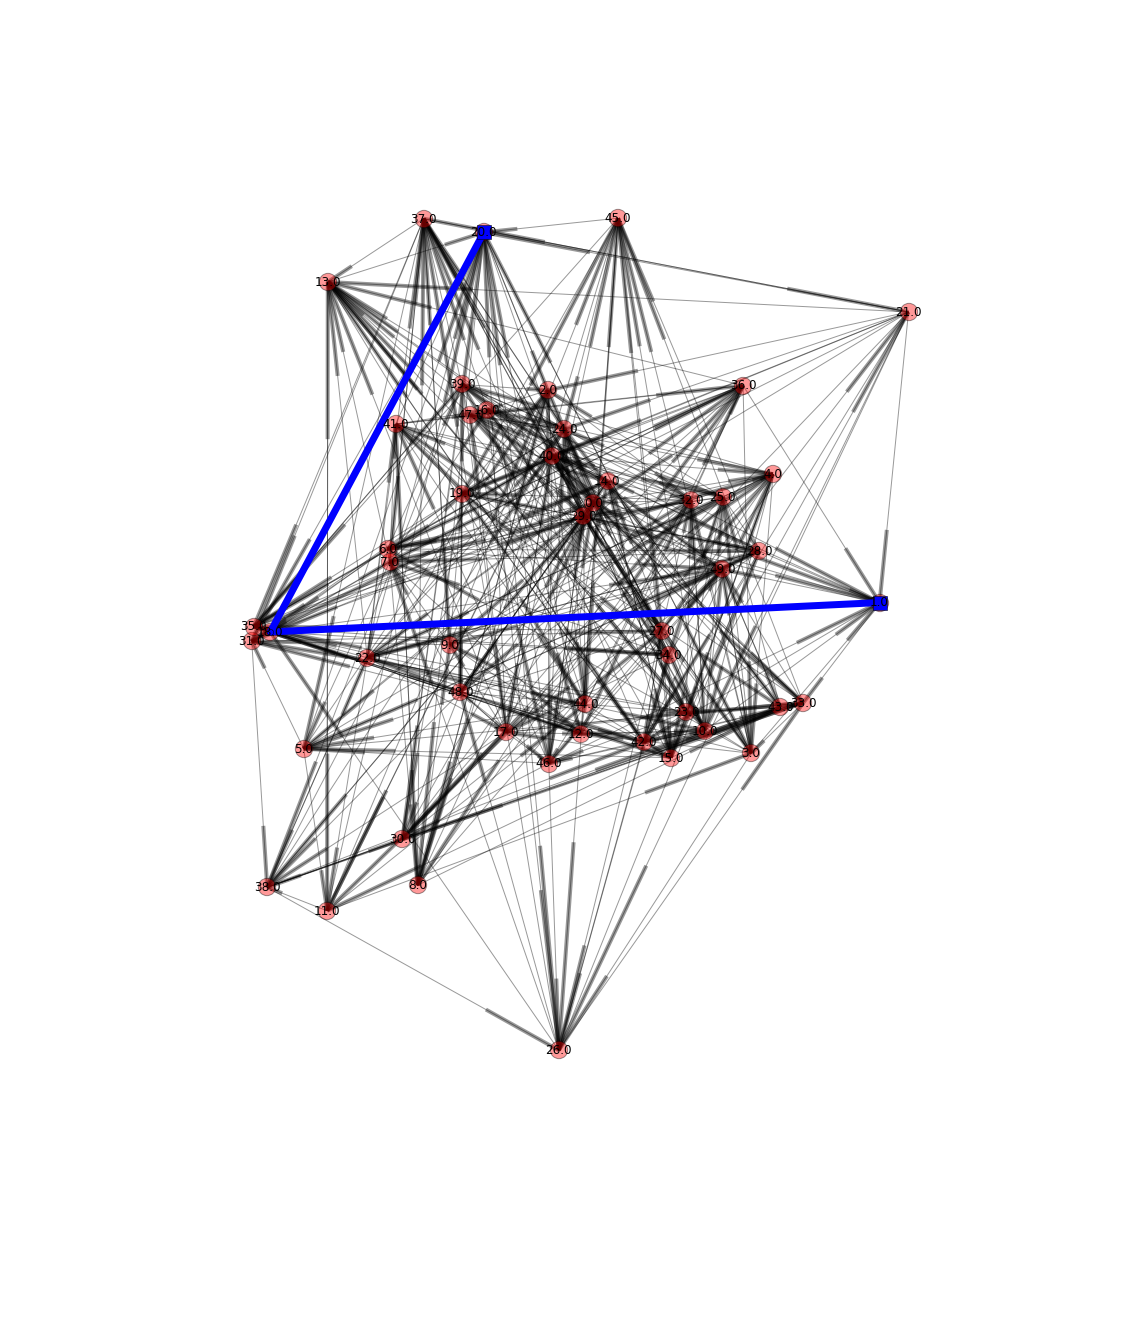

In [134]:
visualize_path(shortestpath_a, G)

In [135]:
G2 = nx.DiGraph()
for i in dataA.index:
       G2.add_edge(dataA.a[i], dataA.b[i], weight = dataA.w[i])

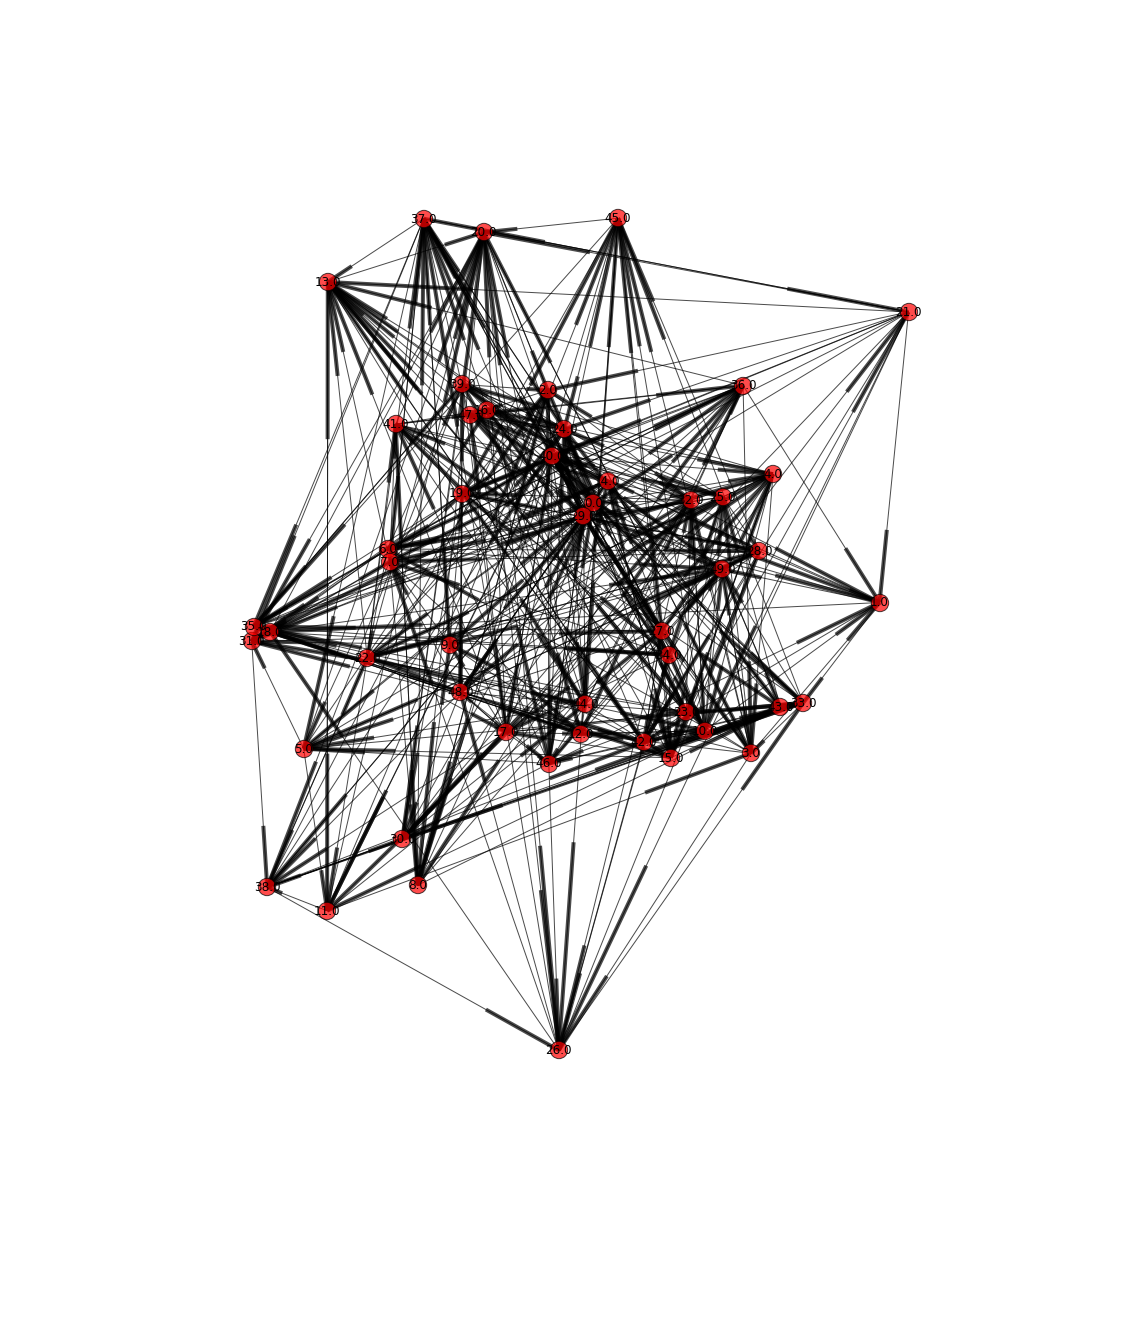

In [136]:
plt.figure(figsize = (15,18))
nx.draw(G2, pos=IntPos, with_labels = True, alpha = 0.7)

In [137]:
from math import sin, cos, sqrt, atan2, radians
def geodist(lon1,lat1,lon2,lat2):
    lat1 = radians(lat1)
    lon1 = radians(lon1)  
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [138]:
nx.set_edge_attributes(G2, 'dist', 0)

In [139]:
for e in G2.edges():
    G2[e[0]][e[1]]['dist']=geodist(IntPos[e[0]][0],IntPos[e[0]][1],IntPos[e[1]][0],IntPos[e[1]][1])

In [140]:
shrtpath_b = nx.shortest_path(G2, G2.nodes()[1], G2.nodes()[20], 'dist')
print len(shrtpath_b)

5


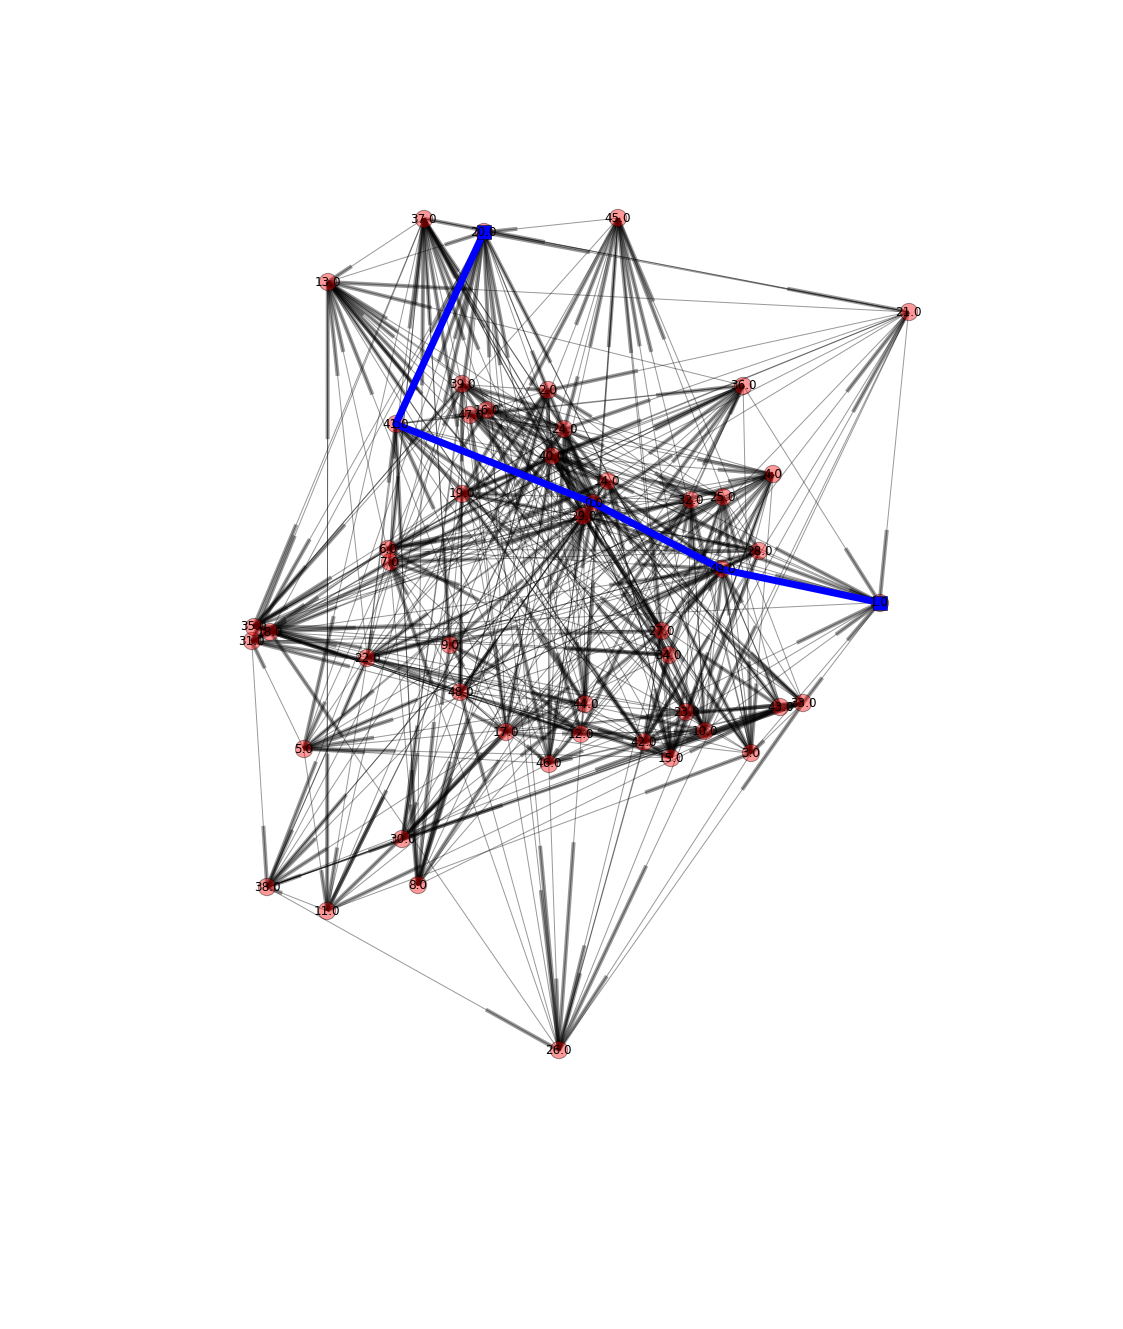

In [141]:
visualize_path(shrtpath_b, G2)

In [142]:
shrtpath_c = nx.shortest_path(G2, G2.nodes()[1], G2.nodes()[20], 'weight')
print len(shrtpath_c)

4


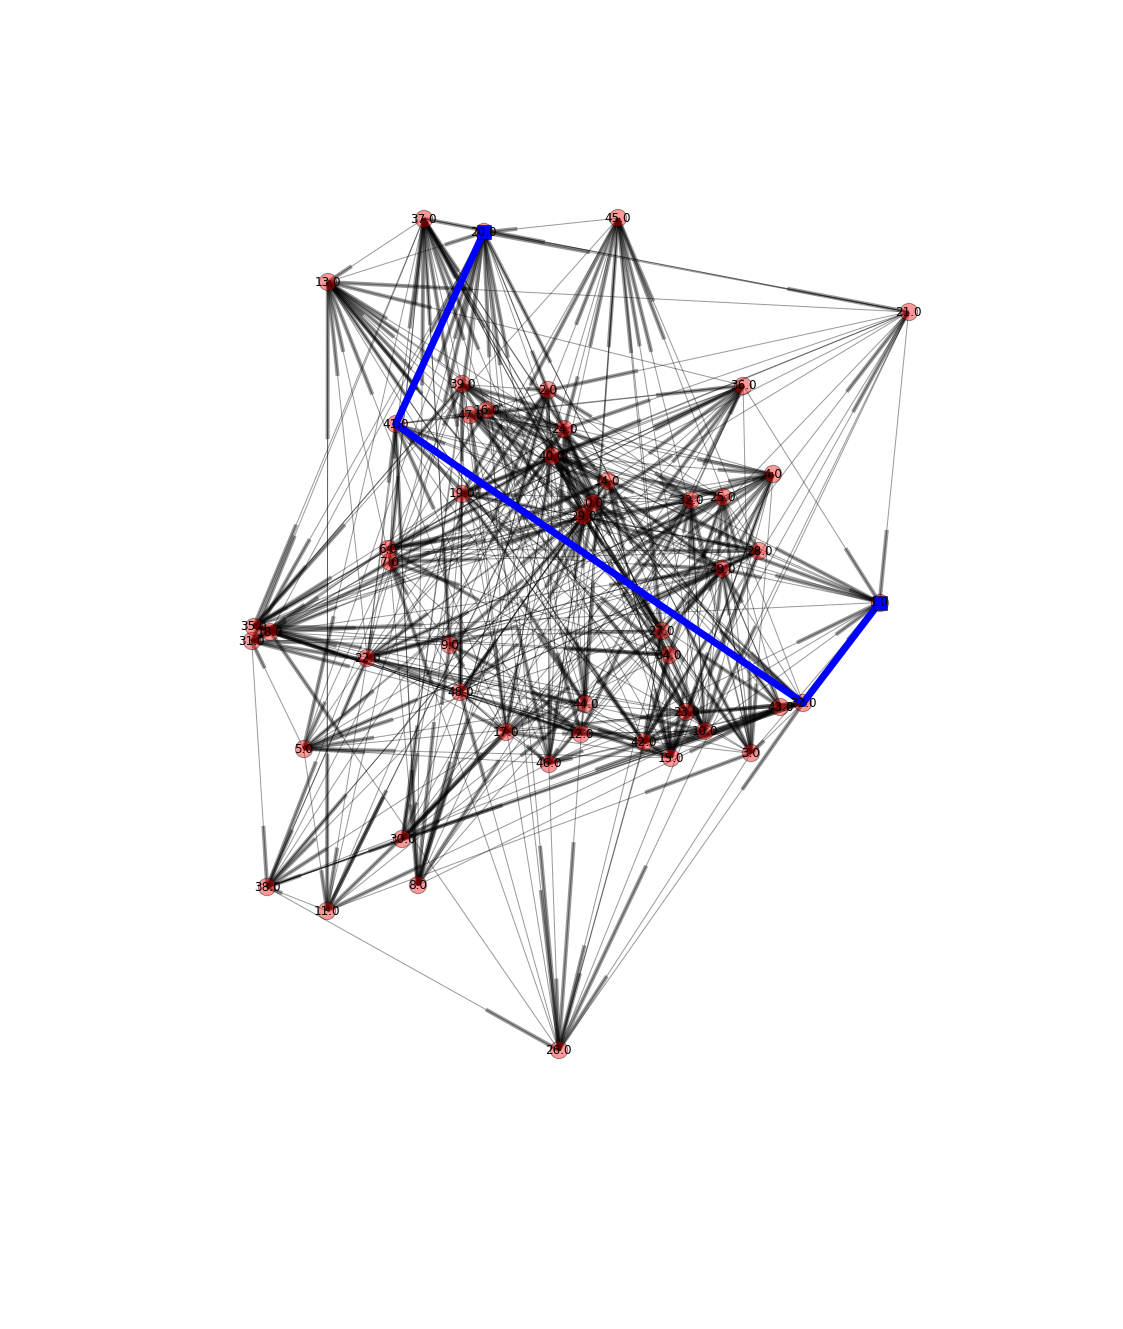

In [143]:
visualize_path(shrtpath_c, G2)

## Problem 2 (20% of credit)

In the above spatial network A (defined by a weighted edge list dataA and nodes spatial locations XY) find the pair of nodes with the higest shortest path length between them in terms of network topology. Visualize the shortest path between the two nodes

In [144]:
shrtpaths = nx.all_pairs_shortest_path(G2)

# Find the longest path
highest = None
length = 0
for a in shrtpaths:
    for b in shrtpaths[a]:
        if len(shrtpaths[a][b]) > length:
            highest = (a,b)
            length = len(shrtpaths[a][b])
print 'The finding has these intersections', shrtpaths[highest[0]][highest[1]]

The finding has these intersections [0.0, 4.0, 7.0, 19.0]


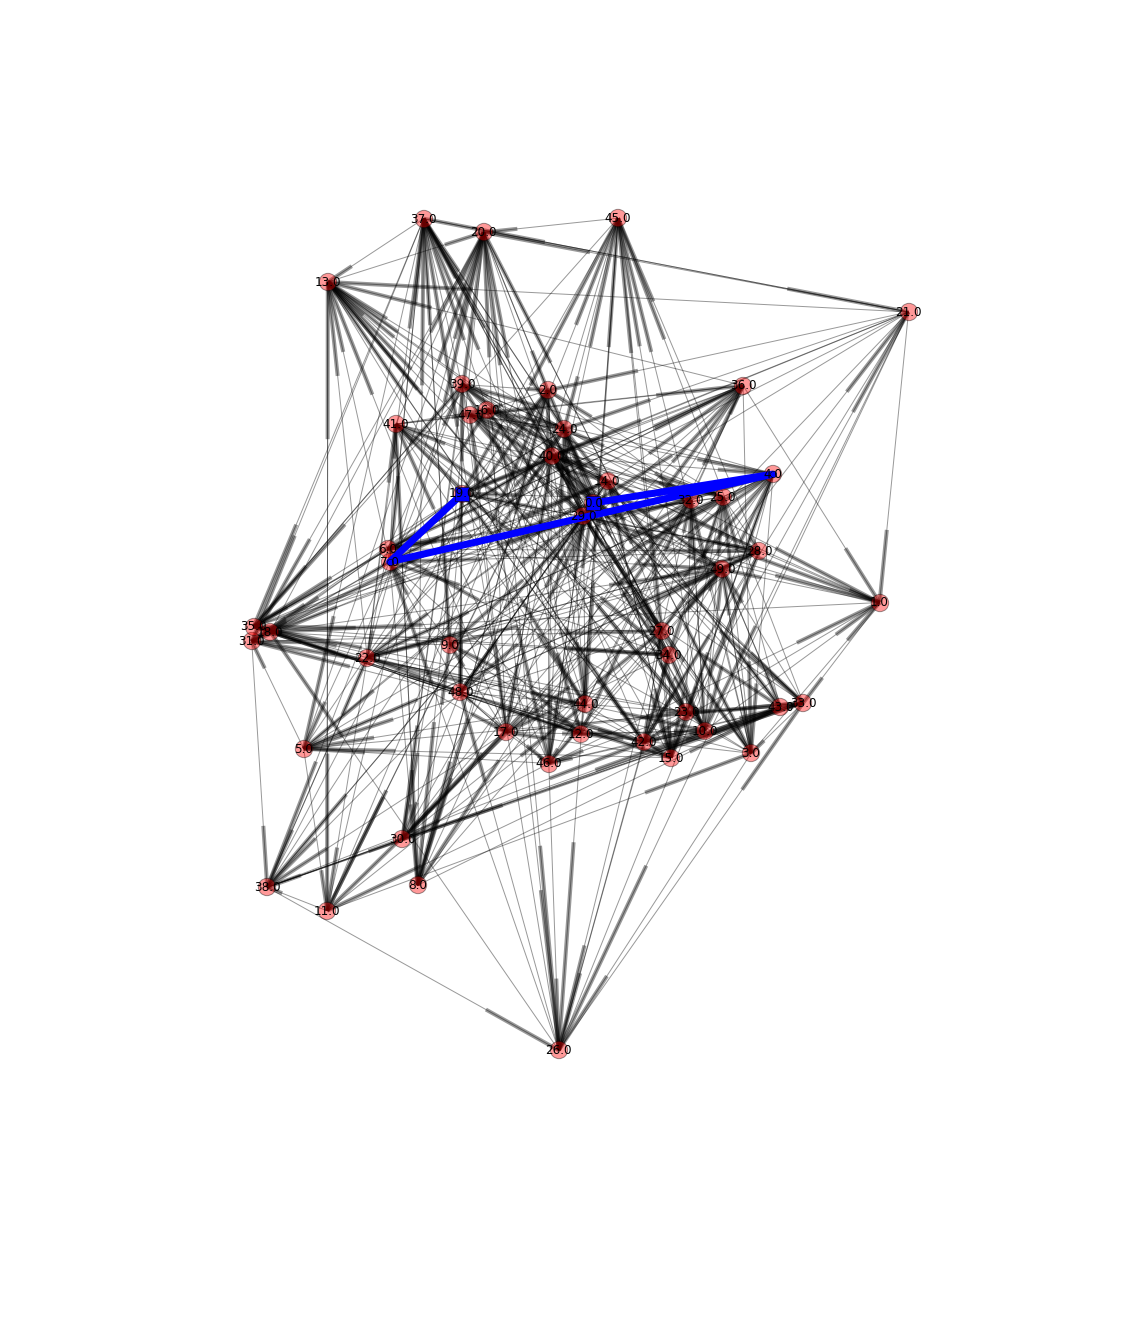

In [145]:
visualize_path(shrtpaths[highest[0]][highest[1]], G2)

## Problem 3 (30% of credit)

For the above spatial network B (defined by a weighted edge list dataB, nodes spatial locations XY) with given weigths $w$ from PB, fit the gravity model (over the entire network) 
$$
e(a,b)=k\cdot w(a)^\alpha w(b)^\beta d(a,b)^{-\gamma},
$$
report the exponents $\alpha$, $\beta$, $\gamma$ and the statistics for the model fit. Visualize the model fit.

In [146]:
a = []
b = []
d = []
w = []

for i in dataB.index:
    A = int(dataB.a[i])
    B = int(dataB.b[i])
    a.append(PB.P[A])
    b.append(PB.P[B])
    w.append(dataB.w[i])
    # Euclidean distance
    d.append(np.linalg.norm(np.array([XY.X[A],XY.Y[A]]) - np.array([XY.X[B],XY.Y[B]])))

#Dataframe with attributes    
df = pd.DataFrame({'a': a, 'b': b, 'dist': d, 'weight': w})

                            OLS Regression Results                            
Dep. Variable:            log(weight)   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     2159.
Date:                Thu, 10 Dec 2015   Prob (F-statistic):               0.00
Time:                        03:12:50   Log-Likelihood:                -3198.6
No. Observations:                2450   AIC:                             6405.
Df Residuals:                    2446   BIC:                             6428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.0960      0.120    -42.518      0.0

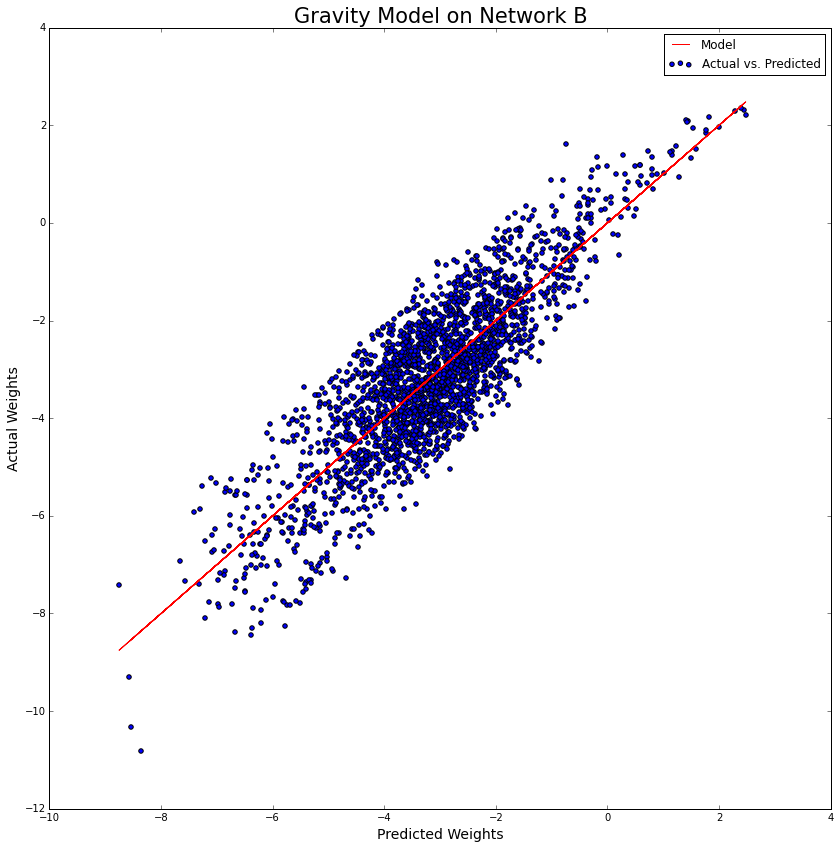

In [147]:
mod = smf.ols(formula='log(weight) ~ log(dist)+log(a)+log(b)', data=df).fit()
print mod.summary()
p = mod.predict(df)

# Plot
figure, ax = plt.subplots(figsize=(14,14))
ax.scatter(p,log(df.weight),label='Actual vs. Predicted')
ax.plot(p,p,'r',label='Model')
ax.set_title('Gravity Model on Network B', fontsize = 21)
ax.set_xlabel('Predicted Weights',fontsize = 14)
ax.set_ylabel('Actual Weights', fontsize = 14)
ax.legend()

## Problem 4 (30% of credit)

For the above spatial network B with given weigths $w$ and given the total strength of outgoing edges $T(a)$ estimated from the network data for each node $a$, fit the locally normalized model (over the entire network)
$$
e(a,b)=T(a) \frac{w(b)^\beta d(a,b)^{-\gamma}}{\sum_{c\neq a} w(c)^\beta d(a,c)^{-\gamma}},
$$
report the exponents $\beta$, $\gamma$. Estimate $R2$ for the fit in the log-scale of the original network. Visualize the model fit.

In [148]:
graph3 = nx.DiGraph()

for i in dataB.index:
    A = int(dataB.a[i])
    B = int(dataB.b[i])
    
    graph3.add_edge(
        A, B, 
        weight=dataB.w[i], 
        dist=np.linalg.norm(np.array([XY.X[A],XY.Y[A]]) - np.array([XY.X[B],XY.Y[B]]))
    )

In [149]:
def LNGmodel(q,G,G_w):
    #first pass - assign relative weights as the model prediction
    for e in G.edges():
        if e[0]!=e[1]:
            G[e[0]][e[1]]['predict']=(G[e[0]][e[1]]['dist']**q[0])*(G_w[e[1]]**q[1])
            
    #compute normalization factors    
    G_norm=G.out_degree(weight='predict')
    G_wout=G.out_degree(weight='weight')
    for a in G.nodes():
        G_norm[a]=(G_wout[a])/(G_norm[a])

    E = []
    E = map(float,E)
    me = []
    me = map(float,me)
    for e in G.edges():
        if e[0]!=e[1]:
            E.append(G[e[0]][e[1]]['weight'])
            me.append(G[e[0]][e[1]]['predict']*G_norm[e[0]])

    E = np.array(E).astype(float)
    me = np.array(me).astype(float)

    R2 = 1-sum(pow(log(E)-log(me),2))/sum(pow(log(E)-mean(log(E)),2)) 
    return (R2,E,me) #performance and edge weights-predictions for fit visualization purposes 

def LNGmodelFit(q,G,G_w):
    #version for maximization
    return -LNGmodel(q,G,G_w)[0]

In [151]:
from scipy import optimize
res=optimize.minimize(LNGmodelFit,[1, 1],method='Nelder-Mead',args=(graph3,PB.P))
print res

  status: 0
    nfev: 97
 success: True
     fun: -0.98340992687397832
       x: array([-2.02919103,  1.48648881])
 message: 'Optimization terminated successfully.'
     nit: 51


In [153]:
(R2,e,me)=LNGmodel(res.x,graph3,PB.P)
print R2, res.x

figure, ax = plt.subplots(figsize=(14,14))
ax.scatter(log(w),log(me),label='Actual vs. Predicted')
ax.plot(log(me),log(me),'r',label='Model')
ax.set_title('Gravity Model With Local Normalization on Network B', fontsize = 21)
ax.set_xlabel('log(Predicted Weights)', fontsize = 14)
ax.set_ylabel('log(Actual Weights)', fontsize = 14)
ax.legend()

0.983409926874 [-2.02919103  1.48648881]


## Extracredit assignment (additional 50% of credit to be applied to this or any past assignment)

Implement radiation model and apply it to US migration data. Visualize the fit. Compare it (visually and quantitatively (R2)) to that of the gravity models with global and local normalization (fitted over the entire dataset).

In [160]:
datam = pd.read_csv('USStates_migration.csv')
datap = pd.read_csv('USstate_pop.csv')
datad = pd.read_csv('USstates_dist.csv')

In [161]:
g1 = nx.DiGraph()

for i in datam.index:
    A = int(datam.i[i])
    B = int(datam.j[i])
    dist = datad.loc[(datad['i']==A) &  (datad['j']==B)].d
    print datam.a[i]
    
    g1.add_edge(
        A, B, 
        weight=datam.a[i], 
        dist=datad.loc[(datad['i']==A) &  (datad['j']==B)].d
    )

588293
93
833
691
2087
2340
101
81
13
12635
18799
1268
263
2823
1562
207
434
925
3065
634
228
1201
3527
123
8922
1395
449
169
280
193
189
410
1812
5420
97
1567
591
758
1332
2999
9326
8747
486
4930
1821
221
708
51
1771
100280
5001
560
7358
3191
180
329
135
7405
1079
844
4510
4119
371
967
108
288
37
671
225
3456
893
117
2043
1118
721
597
1198
416
6124
3991
393
1637
1137
1935
759
2421
554
531
6670
2151
580
3202
5266
598
432
761
1677
2467
1028366
439
35650
12338
1387
541
43
8451
4292
2900
3543
7657
3975
1411
2028
1818
2010
325
945
1017
3840
2314
556
2356
1971
1646
10142
246
3784
7444
2821
4286
1313
6763
3770
7911
2278
214
1971
1422
1346
20073
6585
310
4679
12397
50
4045
369
1642
190
1066
405831
2648
1615
84
81
3025
2112
242
224
3185
2016
433
998
1058
2774
38
423
167
2054
951
2315
6168
49
161
310
22
57
682
1041
327
249
1952
6894
988
582
1333
659
7393
16461
422
645
756
225
335
174
3389
3098
49635
4077
5271168
23234
3699
699
3797
22420
14949
10173
9021
13930
7649
3297
4743
2130
3957
829
8595


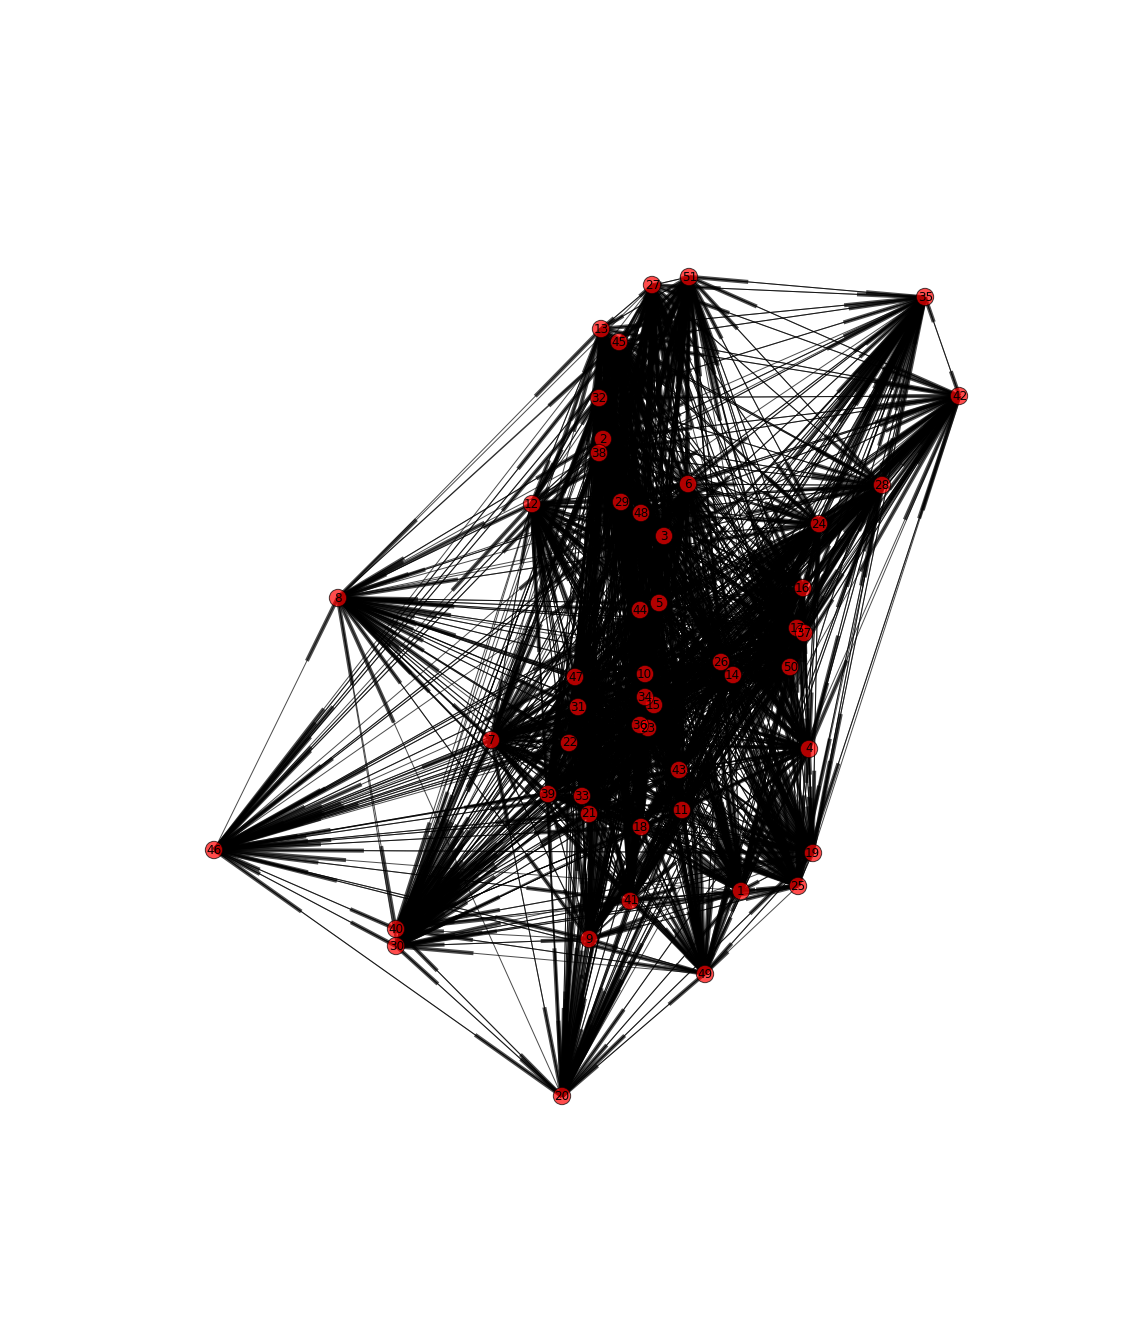

In [162]:
plt.figure(figsize = (15,18))
nx.draw(g1, with_labels = True, alpha = 0.7)

In [172]:
T = pd.DataFrame()
t = []
for i in range(0,52):
    t.append(sum(datam.loc[datam['i']==i].a))
#sum(datam.loc[datam['i']==1].a)
T['a'] = t
print type(t[51])
e_abl = []

def radiation(a,b,dist):
    dist = dist
    #print dist
    d = list(datad.loc[datad['i']==a].d)
    #print d
    b_col = list(datad.loc[datad['i']==a].j)
    s_ab = long(datap.loc[datap['State']==a].Population)
    #sum_dp = 
    for i in range(len(d)):
        if dist<=d[i]:
            s_ab = s_ab + long(datap.loc[datap['State']==b_col[i]].Population)
    p_a = long(datap.loc[datap['State']==a].Population)
    p_b = long(datap.loc[datap['State']==b].Population)
    #print t[a],p_a,p_b
    e_ab = (t[a]*p_a*p_b)/((p_a+s_ab)*(p_a+p_b+s_ab))
    e_abl.append(e_ab)
    print e_ab
    return e_ab

<type 'long'>


In [164]:
g2 = nx.DiGraph()

for i in datam.index:
    A = int(datam.i[i])
    #print A
    B = int(datam.j[i])
    #print A,B
    if A==B:
        dist = 0
    else :    
        dist = float(datad.loc[(datad['i']==A) &  (datad['j']==B)].d)
    weight = radiation(A,B,dist)
    
    g2.add_edge(
        A, B, weight = weight,dist=dist
        
    )

160
174
1337
86
20862
1093
363
27
18
2590
853
47
123
1478
489
163
163
262
140
79
927
1355
2952
1078
57
459
46
78
358
63
1525
80
7253
1837
68
3079
181
718
2982
236
440
5357
304
1689
1933
83
1008
16
16812
0
24600
14528
4142
22144
10835
4228
3783
24598
22629
2
21
18316
18354
13238
13777
15631
7027
14937
15469
19935
16674
12197
19657
7
10793
2305
13117
9974
16681
20945
3821
20607
17312
47
17139
17029
4341
19123
26644
14301
2694
19253
93
7842
16779
3119
3903
10
508
1718
11450
328
1843
164
111
34019
13719
22
42
16682
6871
1995
316
3402
3169
418
4816
6330
13867
3747
1465
6604
15
114
105
346
7356
40
26198
13214
15
16390
482
241
15445
207
3819
21
6721
9223
87
87
9628
703
604
5679
4
103
13
537
41
8878
319
216
12
2043
838
19
44
662
231
56
45
106
89
34
615
806
1101
194
37
190
16
26
120
28
1008
35
3478
1456
3
1814
83
264
1785
244
4
208
2833
102
1202
725
48
220
5
21751
36
2789
9948
60265
2387
13226
1059
721
189629
76381
85
167
87711
35795
11696
8803
17666
18945
2818
30232
41214
88925
33818
8483
3437

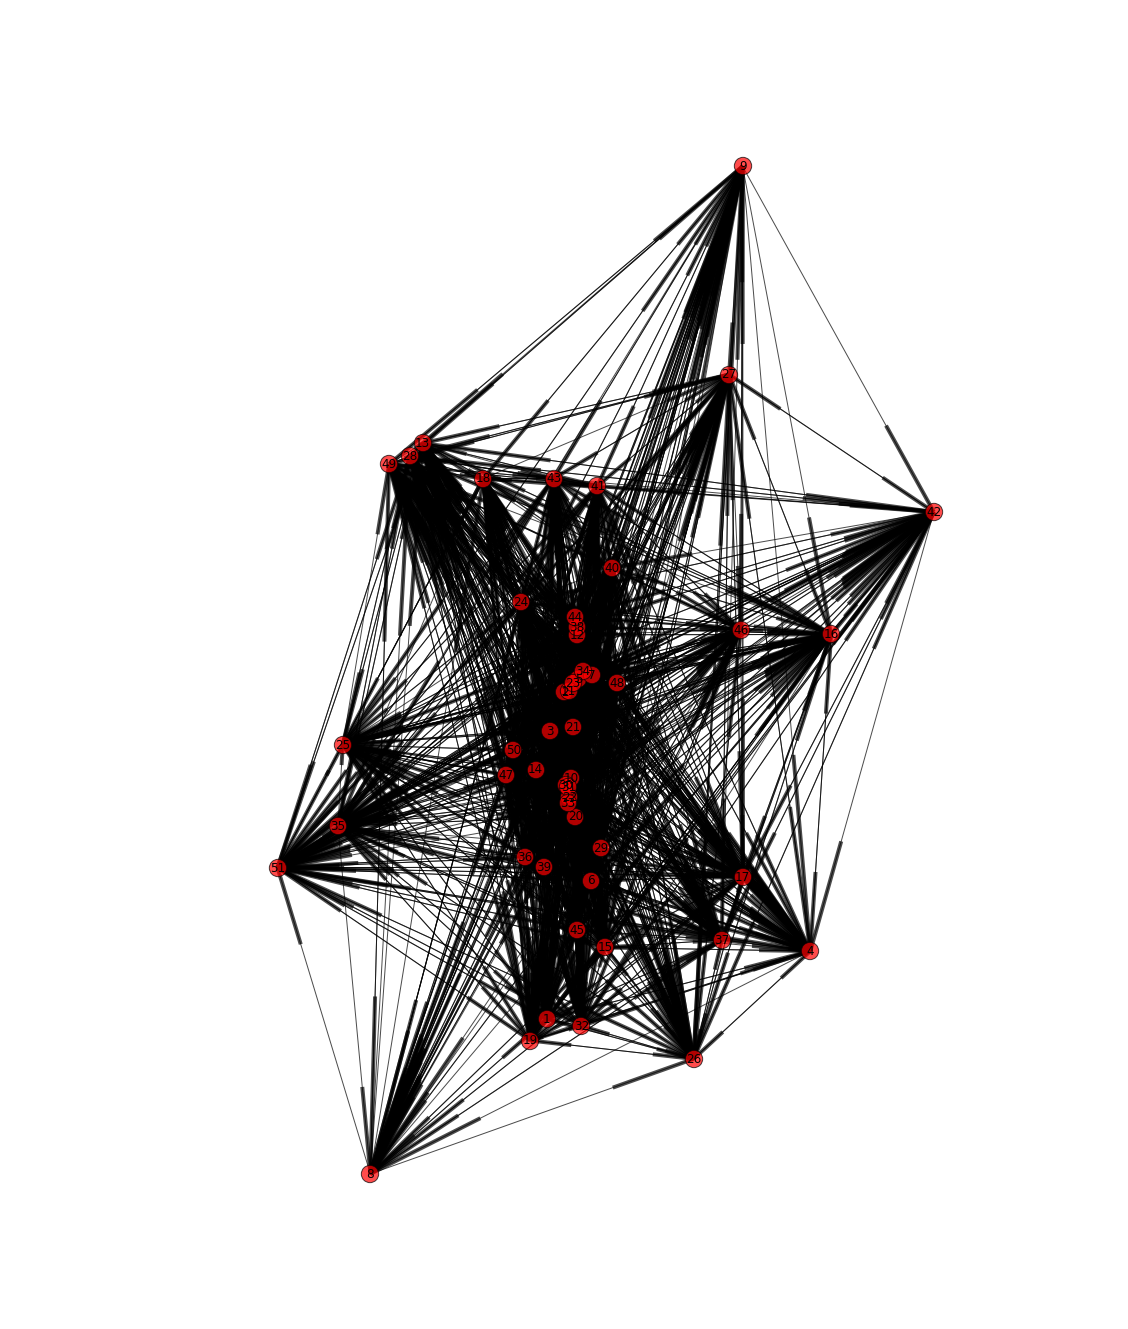

In [111]:
plt.figure(figsize = (15,18))
nx.draw(g2, with_labels = True, alpha = 0.7)

In [169]:
def LNGmodel(q,G,G_w):
    #first pass - assign relative weights as the model prediction
    for e in G.edges():
        if e[0]!=e[1]:
            G[e[0]][e[1]]['predict']=(G[e[0]][e[1]]['dist']**q[0])*(G_w[e[1]]**q[1])
            
    #compute normalization factors    
    G_norm=G.out_degree(weight='predict')
    G_wout=G.out_degree(weight='weight')
    for a in G.nodes():
        G_norm[a]=(G_wout[a])/(G_norm[a])

    E = []
    E = map(float,E)
    me = []
    me = map(float,me)
    for e in G.edges():
        if e[0]!=e[1]:
            E.append(G[e[0]][e[1]]['weight'])
            me.append(G[e[0]][e[1]]['predict']*G_norm[e[0]])

    E = np.array(E).astype(float)
    me = np.array(me).astype(float)

    R2 = 1-sum(pow(log(E)-log(me),2))/sum(pow(log(E)-mean(log(E)),2)) 
    return (R2,E,me) #performance and edge weights-predictions for fit visualization purposes 

def LNGmodelFit(q,G,G_w):
    #version for maximization
    return -LNGmodel(q,G,G_w)[0]

TypeError: unsupported operand type(s) for *: 'dict' and 'long'

In [171]:
# from scipy import optimize
# res = optimize.minimize(LNGmodelFit,[1, 1],method='Nelder-Mead',args=(g2,datam))
# print res

In [117]:
#datam.loc[datam['i']==1]
(R2,e,me)=LNGmodel(res.x,graph3,PB.P)
print R2, res.x
figure, ax = plt.subplots(figsize=(14,14))
ax.scatter(log(w),log(me),label='Actual vs. Predicted')
ax.plot(log(me),log(me),'r',label='Model')
ax.set_title('Gravity Model With Local Normalization on Network B', fontsize = 21)
ax.set_xlabel('log(Predicted Weights)', fontsize = 14)
ax.set_ylabel('log(Actual Weights)', fontsize = 14)
ax.legend()